In [1]:
# Import the modules

import numpy as np
import scipy as sp

import matplotlib.pyplot as plt 

np.random.seed(1)

In [2]:
# Prepare the training data

x_ori = np.array([
                  [0,1,1,0,0,0,0,0,0], 
                  [0,0,1,1,0,0,0,0,0],
                  [0,0,0,0,0,1,1,0,0],
                  [0,0,0,0,0,0,1,1,0]
                 ]
                ) 

x_ori_sep = np.array([
                  [0,1,1,0,0,0,0,0,0], 
                  [0,0,0,1,1,0,0,0,0],
                  [0,0,0,0,0,1,1,0,0],
                  [0,0,0,0,0,0,0,1,1]
                 ]
                ) 

labels4train = np.random.choice(np.arange(x_ori.shape[0]), size=10000, replace=True)

x = np.array([ x_ori[idx] + np.random.rand(x_ori.shape[1]) * 0.1 for idx in labels4train ])

x_sep = np.array([ x_ori_sep[idx] + np.random.rand(x_ori_sep.shape[1]) * 0.1 for idx in labels4train ])

In [3]:
# Activation Function

def y_of_x(x):
    return 0.5*(x + np.abs(x))

# Training input weights

def update_w(x, w, limit=False, ltd=True, mature=True, compet=True, rate=0.1):
    
    w_local = np.copy(w)
    
    for idx in range(x.shape[0]):
        
        xt = x[idx]

        noise = np.heaviside(0.1 - np.random.random_sample(w_local.shape[0]), 0)
        
        x_in = xt 
        x_in = 0.5*(x_in + np.absolute(x_in))
        
        y_in = np.matmul(w_local, x_in.transpose()) + noise * 0.01
                
        y = y_of_x(y_in)
        
        if ltd:

            delta_w = np.outer(y, xt - 0.25)

            w_local += rate * delta_w

            for i in range(w_local.shape[0]):
                if np.max(w_local[i]) >= 1.0:
                    w_local[i] /= np.max(w_local[i])
        
        elif limit:

            delta_w = np.outer(y, xt)
            
            if mature:

                for i in range(w_local.shape[0]):
                    if np.sum(w_local[i]) >= 0.1:
                        delta_w[i] *= 0

            if compet:

                for i in range(delta_w.shape[1]):
                    delta_w[:,i] -= np.mean(delta_w[:,i])
                    
            for i in range(w_local.shape[1]):
                if np.max(w_local[:,i]) > 1:
                    w_local[:,i] /= np.max(w_local[:,i])

            w_local += rate * delta_w

            for i in range(w_local.shape[0]):
                if np.max(w_local[i]) < 0:
                    w_local[i] = np.zeros_like(w_local[i])
                    
        else:

            delta_w = np.outer(y, xt)

            w_local += rate * delta_w

            for i in range(w_local.shape[0]):
                if np.max(w_local[i]) > 1:
                    w_local[i] /= np.max(w_local[i])

    return w_local


In [4]:
# Start trainings

w_compet = np.zeros((100,x.shape[1]))
for t in range(1):
    w_compet = update_w(x, w_compet, limit=True, ltd=False)
    
w_ltp = np.zeros((100,x.shape[1]))
for t in range(1):
    w_ltp = update_w(x, w_ltp, limit=False, ltd=False)
    
w_ltd = np.zeros((100,x.shape[1]))
for t in range(1):
    w_ltd = update_w(x, w_ltd, limit=False, ltd=True)
    
w_ltd_sep = np.zeros((100,x.shape[1]))
for t in range(1):
    w_ltd_sep = update_w(x_sep, w_ltd_sep, limit=False, ltd=True)

In [5]:
list1_compet = [idx for idx in range(w_compet.shape[0]) if np.argsort(w_compet[idx])[-2] == 1]
list2_compet = [idx for idx in range(w_compet.shape[0]) if np.argsort(w_compet[idx])[-2] == 3]
list3_compet = [idx for idx in range(w_compet.shape[0]) if np.argsort(w_compet[idx])[-2] == 5]
list4_compet = [idx for idx in range(w_compet.shape[0]) if np.argsort(w_compet[idx])[-2] == 7]

list1_ltd = [idx for idx in range(w_ltd.shape[0]) if np.argsort(w_ltd[idx])[-1] == 2]
list2_ltd = [idx for idx in range(w_ltd.shape[0]) if np.argsort(w_ltd[idx])[-1] == 6]

list1_ltd_sep = [idx for idx in range(w_ltd_sep.shape[0]) if np.argsort(w_ltd_sep[idx])[-1] in [1,2]]
list2_ltd_sep = [idx for idx in range(w_ltd_sep.shape[0]) if np.argsort(w_ltd_sep[idx])[-1] in [3,4]]
list3_ltd_sep = [idx for idx in range(w_ltd_sep.shape[0]) if np.argsort(w_ltd_sep[idx])[-1] in [5,6]]
list4_ltd_sep = [idx for idx in range(w_ltd_sep.shape[0]) if np.argsort(w_ltd_sep[idx])[-1] in [7,8]]

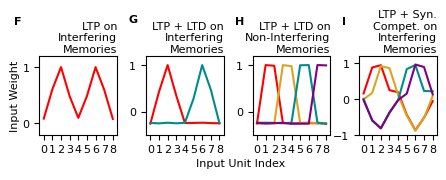

In [6]:
# The Plot of Fig 1

papersize=(4.33, 1.7)
fig = plt.figure(figsize=papersize)

all_w = [w_ltp, w_ltd, w_ltd_sep, w_compet]

n_rows = 1
n_cols = 4

labels = np.array([chr(ord("F")+i) for i in range(24)]).reshape((6,4))

axs = [[fig.add_subplot(n_rows, n_cols, i*n_cols+j+1) for j in range(n_cols)] for i in range(n_rows)]

colors2 = ["red", "#Daa520", "#008b8b", "purple"]

for idx in [0]:
    ax0 = axs[idx][0]
    ax1 = axs[idx][1]
    ax2 = axs[idx][2]
    ax3 = axs[idx][3]
    
    label_left = -0.225
    label_top = 1.4
    
    ax0.text(label_left-0.1,label_top,labels[idx,0], fontsize=8,weight='bold', transform=ax0.transAxes)
    ax0.text(1,1.05,"LTP on\nInterfering\nMemories", fontsize=8, ha="right", transform=ax0.transAxes)
    ax0.set_xlabel(" ", fontsize=8)
    ax0.set_ylabel("Input Weight", fontsize=8)
    ax0.yaxis.set_label_coords(-0.25,0.5)
    ax0.set_xticks( np.arange(9))
    ax0.set_yticks( [-1,0,1] )
    ax0.set_xlim((-0.5,8.5))
    ax0.set_ylim((-0.2,1.2))
    ax0.tick_params(labelsize=8)
    ax0.plot(w_ltp[0], color="red")

    ax1.text(label_left,label_top,labels[idx,1], fontsize=8, weight='bold', va="bottom", transform=ax1.transAxes)
    ax1.text(1,1.05, "LTP + LTD on\nInterfering\nMemories", fontsize=8, ha="right", transform=ax1.transAxes)
    ax1.set_xlabel(" ", fontsize=8)
    ax1.set_ylabel(" ", fontsize=8)
    ax1.yaxis.set_label_coords(-0.15,0.5)
    ax1.set_xticks( np.arange(9))
    ax1.set_yticks( [-1,0,1] )
    ax1.set_xlim((-0.5,8.5))
    ax1.set_ylim((-0.5,1.2))
    ax1.tick_params(labelsize=8)
    ax1.plot(w_ltd[list1_ltd[1]], "-", color="red")
    ax1.plot(w_ltd[list2_ltd[1]], "-", color="#008b8b")

    ax2.text(label_left,label_top,labels[idx,2], fontsize=8, weight='bold', transform=ax2.transAxes)
    ax2.text(1,1.05, "LTP + LTD on\nNon-Interfering\nMemories", fontsize=8, ha="right", transform=ax2.transAxes)
    ax2.set_xlabel("Input Unit Index", fontsize=8)
    ax2.set_ylabel(" ", fontsize=8)
    ax2.yaxis.set_label_coords(-0.15,0.5)
    ax2.xaxis.set_label_coords(-0.15,-0.3)
    ax2.set_xticks( np.arange(9))
    ax2.set_yticks( [-1,0,1] )
    ax2.set_xlim((-0.5,8.5))
    ax2.set_ylim((-0.5,1.2))
    ax2.tick_params(labelsize=8)
    ax2.plot(w_ltd_sep[list1_ltd_sep[1]], color=colors2[0])
    ax2.plot(w_ltd_sep[list2_ltd_sep[1]], color=colors2[1])
    ax2.plot(w_ltd_sep[list3_ltd_sep[1]], color=colors2[2])
    ax2.plot(w_ltd_sep[list4_ltd_sep[1]], color=colors2[3])  
    
    ax3.text(label_left,label_top,labels[idx,3], fontsize=8, weight='bold', transform=ax3.transAxes)
    ax3.text(1,1.05, "LTP + Syn.\nCompet. on\nInterfering\nMemories", fontsize=8, ha="right", transform=ax3.transAxes)
    ax3.set_xlabel(" ", fontsize=8)
    ax3.set_ylabel(" ", fontsize=8)
    ax3.yaxis.set_label_coords(-0.15,0.5)
    ax3.set_xticks( np.arange(9))
    ax3.set_yticks( [-1,0,1] )
    ax3.set_xlim((-0.5,8.5))
    ax3.set_ylim((-1,1.2))
    ax3.tick_params(labelsize=8)
    ax3.plot(w_compet[list1_compet[np.argmax(w_compet[list1_compet,1])]], color=colors2[0])
    ax3.plot(w_compet[list2_compet[np.argmax(w_compet[list2_compet,3])]], color=colors2[1])
    ax3.plot(w_compet[list3_compet[np.argmax(w_compet[list3_compet,5])]], color=colors2[2])
    ax3.plot(w_compet[list4_compet[np.argmax(w_compet[list4_compet,7])]], color=colors2[3])

    ax0 = None
    ax1 = None
    ax2 = None
    ax3 = None
    
plt.subplots_adjust(left=0.1,
                    bottom=-0.05, 
                    right=1, 
                    top=0.5, 
                    wspace=0.3, 
                    hspace=0)

fig.tight_layout(pad=0.2,h_pad=0, w_pad=0.2)
fig.savefig("Fig01_bottom.pdf")

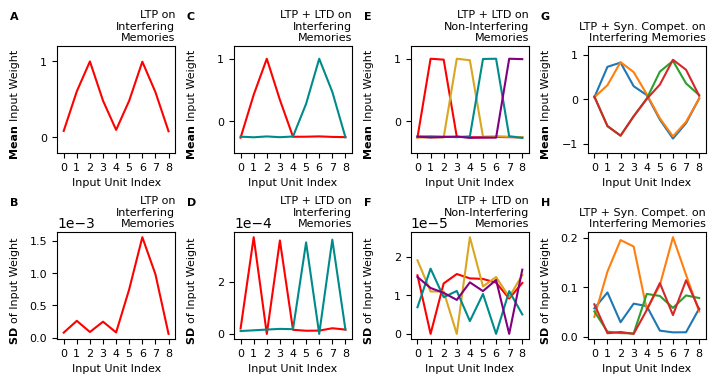

In [7]:
# The plot of Fig S1

papersize=(17.8/2.525, 3.75)
fig = plt.figure(figsize=papersize)

all_w = [w_ltp, w_ltd, w_ltd_sep, w_compet]

n_rows = 2

axs = [[fig.add_subplot(n_rows, 4, i*4+j+1) for j in range(4)] for i in range(n_rows)]

colors2 = ["red", "#Daa520", "#008b8b", "purple"]

for idx in [0]:
    ax0 = axs[idx][0]
    ax1 = axs[idx][1]
    ax2 = axs[idx][2]
    ax3 = axs[idx][3]
    
    ax0.text(-0.4,1.25, "A", weight="bold", fontsize=8, transform=ax0.transAxes)
    ax0.text(1,1.05, "LTP on\nInterfering\nMemories", fontsize=8, ha="right", transform=ax0.transAxes)
    ax0.set_xlabel("Input Unit Index", fontsize=8)
    ax0.set_ylabel(" ", fontsize=8)
    ax0.text(-0.4, 0.3, "Mean ", fontsize=8, rotation=90, va="top", fontweight="bold", transform=ax0.transAxes)
    ax0.text(-0.4, 0.3, "Input Weight", fontsize=8, rotation=90, va="bottom", transform=ax0.transAxes)
    ax0.set_xticks( np.arange(9))
    ax0.set_yticks( [-1,0,1] )
    ax0.set_xlim((-0.5,8.5))
    ax0.set_ylim((-0.2,1.2))
    ax0.tick_params(labelsize=8)
    ax0.plot(np.mean(w_ltp, axis=0), color="red")

    ax1.text(-0.4,1.25, "C", weight="bold", fontsize=8, transform=ax1.transAxes)
    ax1.text(1,1.05, "LTP + LTD on\nInterfering\nMemories", fontsize=8, ha="right", transform=ax1.transAxes)
    ax1.set_xlabel("Input Unit Index", fontsize=8)
    ax1.set_ylabel(" ", fontsize=8)
    ax1.text(-0.4, 0.3, "Mean ", fontsize=8, rotation=90, va="top", fontweight="bold", transform=ax1.transAxes)
    ax1.text(-0.4, 0.3, "Input Weight", fontsize=8, rotation=90, va="bottom", transform=ax1.transAxes)
    ax1.set_xticks( np.arange(9))
    ax1.set_yticks( [-1,0,1] )
    ax1.set_xlim((-0.5,8.5))
    ax1.set_ylim((-0.5,1.2))
    ax1.tick_params(labelsize=8)
    ax1.plot(np.mean(w_ltd[list1_ltd], axis=0), "-", color="red")
    ax1.plot(np.mean(w_ltd[list2_ltd], axis=0), "-", color="#008b8b")

    ax2.text(-0.4,1.25, "E", weight="bold", fontsize=8, transform=ax2.transAxes)
    ax2.text(1,1.05, "LTP + LTD on\nNon-Interfering\nMemories", fontsize=8, ha="right", transform=ax2.transAxes)
    ax2.set_xlabel("Input Unit Index", fontsize=8)
    ax2.set_ylabel(" ", fontsize=8)
    ax2.text(-0.4, 0.3, "Mean ", fontsize=8, rotation=90, va="top", fontweight="bold", transform=ax2.transAxes)
    ax2.text(-0.4, 0.3, "Input Weight", fontsize=8, rotation=90, va="bottom", transform=ax2.transAxes)
    ax2.set_xticks( np.arange(9))
    ax2.set_yticks( [-1,0,1] )
    ax2.set_xlim((-0.5,8.5))
    ax2.set_ylim((-0.5,1.2))
    ax2.tick_params(labelsize=8)
    ax2.plot(np.mean(w_ltd_sep[list1_ltd_sep], axis=0), color=colors2[0])
    ax2.plot(np.mean(w_ltd_sep[list2_ltd_sep], axis=0), color=colors2[1])
    ax2.plot(np.mean(w_ltd_sep[list3_ltd_sep], axis=0), color=colors2[2])
    ax2.plot(np.mean(w_ltd_sep[list4_ltd_sep], axis=0), color=colors2[3])  

    ax3.text(-0.4,1.25, "G", weight="bold", fontsize=8, transform=ax3.transAxes)
    ax3.text(1,1.05, "LTP + Syn. Compet. on\nInterfering Memories", fontsize=8, ha="right", transform=ax3.transAxes)
    ax3.set_xlabel("Input Unit Index", fontsize=8)
    ax3.set_ylabel(" ", fontsize=8)
    ax3.text(-0.4, 0.3, "Mean ", fontsize=8, rotation=90, va="top", fontweight="bold", transform=ax3.transAxes)
    ax3.text(-0.4, 0.3, "Input Weight", fontsize=8, rotation=90, va="bottom", transform=ax3.transAxes)
    ax3.set_xticks( np.arange(9))
    ax3.set_yticks( [-1,0,1] )
    ax3.set_xlim((-0.5,8.5))
    ax3.set_ylim((-1.2,1.2))
    ax3.tick_params(labelsize=8) 
    ax3.plot(np.mean(w_compet[list1_compet], axis=0))
    ax3.plot(np.mean(w_compet[list2_compet], axis=0))
    ax3.plot(np.mean(w_compet[list3_compet], axis=0))
    ax3.plot(np.mean(w_compet[list4_compet], axis=0))


    ax0 = None
    ax1 = None
    ax2 = None
    ax3 = None


for idx in [1]:
    ax0 = axs[idx][0]
    ax1 = axs[idx][1]
    ax2 = axs[idx][2]
    ax3 = axs[idx][3]
    
    ax0.text(-0.4,1.25, "B", weight="bold", fontsize=8, transform=ax0.transAxes)
    ax0.text(1,1.05, "LTP on\nInterfering\nMemories", fontsize=8, ha="right", transform=ax0.transAxes)
    ax0.set_xlabel("Input Unit Index", fontsize=8)
    ax0.set_ylabel(" ", fontsize=8)
    ax0.text(-0.4, 0.15, "SD ", fontsize=8, rotation=90, va="top", fontweight="bold", transform=ax0.transAxes)
    ax0.text(-0.4, 0.15, "of Input Weight", fontsize=8, rotation=90, va="bottom", transform=ax0.transAxes)
    ax0.set_xticks( np.arange(9))
    ax0.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#    ax0.set_yticks( [0,0.1,0.2] )
    ax0.set_xlim((-0.5,8.5))
#    ax0.set_ylim((-0.02,0.2))
    ax0.tick_params(labelsize=8)
    ax0.plot(np.std(w_ltp, axis=0), color="red")

    ax1.text(-0.4,1.25, "D", weight="bold", fontsize=8, transform=ax1.transAxes)
    ax1.text(1,1.05, "LTP + LTD on\nInterfering\nMemories", fontsize=8, ha="right", transform=ax1.transAxes)
    ax1.set_xlabel("Input Unit Index", fontsize=8)
    ax1.set_ylabel(" ", fontsize=8)
    ax1.text(-0.4, 0.15, "SD ", fontsize=8, rotation=90, va="top", fontweight="bold", transform=ax1.transAxes)
    ax1.text(-0.4, 0.15, "of Input Weight", fontsize=8, rotation=90, va="bottom", transform=ax1.transAxes)
    ax1.set_xticks( np.arange(9))
    ax1.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#    ax1.set_yticks( [0,0.1,0.2] )
    ax1.set_xlim((-0.5,8.5))
#    ax1.set_ylim((-0.02,0.2))
    ax1.tick_params(labelsize=8)
    ax1.plot(np.std(w_ltd[list1_ltd], axis=0), "-", color="red")
    ax1.plot(np.std(w_ltd[list2_ltd], axis=0), "-", color="#008b8b")

    ax2.text(-0.4,1.25, "F", weight="bold", fontsize=8, transform=ax2.transAxes)
    ax2.text(1,1.05, "LTP + LTD on\nNon-Interfering\nMemories", fontsize=8, ha="right", transform=ax2.transAxes)
    ax2.set_xlabel("Input Unit Index", fontsize=8)
    ax2.set_ylabel(" ", fontsize=8)
    ax2.text(-0.4, 0.15, "SD ", fontsize=8, rotation=90, va="top", fontweight="bold", transform=ax2.transAxes)
    ax2.text(-0.4, 0.15, "of Input Weight", fontsize=8, rotation=90, va="bottom", transform=ax2.transAxes)
    ax2.set_xticks( np.arange(9))
#    ax2.set_yticks( [0,0.1,0.2] )
    ax2.set_xlim((-0.5,8.5))
#    ax2.set_ylim((-0.002,0.01))
    ax2.tick_params(labelsize=8)
    ax2.plot(np.std(w_ltd_sep[list1_ltd_sep], axis=0), color=colors2[0])
    ax2.plot(np.std(w_ltd_sep[list2_ltd_sep], axis=0), color=colors2[1])
    ax2.plot(np.std(w_ltd_sep[list3_ltd_sep], axis=0), color=colors2[2])
    ax2.plot(np.std(w_ltd_sep[list4_ltd_sep], axis=0), color=colors2[3])

    ax3.text(-0.4,1.25, "H", weight="bold", fontsize=8, transform=ax3.transAxes)
    ax3.text(1,1.05, "LTP + Syn. Compet. on\nInterfering Memories", fontsize=8, ha="right", transform=ax3.transAxes)
    ax3.set_xlabel("Input Unit Index", fontsize=8)
    ax3.set_ylabel(" ", fontsize=8)
    ax3.text(-0.4, 0.15, "SD ", fontsize=8, rotation=90, va="top", fontweight="bold", transform=ax3.transAxes)
    ax3.text(-0.4, 0.15, "of Input Weight", fontsize=8, rotation=90, va="bottom", transform=ax3.transAxes)
    ax3.set_xticks( np.arange(9))
#    ax3.set_yticks( [0,0.1,0.2] )
    ax3.set_xlim((-0.5,8.5))
#    ax3.set_ylim((-0.002,0.01))
    ax3.tick_params(labelsize=8)
    ax3.plot(np.std(w_compet[list1_compet], axis=0))
    ax3.plot(np.std(w_compet[list2_compet], axis=0))
    ax3.plot(np.std(w_compet[list3_compet], axis=0))
    ax3.plot(np.std(w_compet[list4_compet], axis=0))

    ax0 = None
    ax1 = None
    ax2 = None
    ax3 = None
    

plt.subplots_adjust(left=0.075,
                    bottom=0.105, 
                    right=0.995, 
                    top=0.885, 
                    wspace=0.5, 
                    hspace=0.75)

plt.savefig("FigS01.pdf")